Страница датасета на Kaggle: https://www.kaggle.com/c/titanic

In [5]:
%config IPCompleter.greedy=True

In [6]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [11]:
#from IPython.display import HTML
#style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
#HTML(style)

In [13]:
titanic_data = pd.read_csv('files/titanic/train.csv')

In [14]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверим наличие пропущенных значений.

In [15]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Временно отбросим переменные, пока не представляющие интереса.

In [16]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [18]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [19]:
y = titanic_data.Survived

In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Заполним пропущенные значения для возраст медианным значением

In [23]:
X.Age.median()  # baseline

28.0

In [24]:
X = X.fillna({'Age':X.Age.median()})

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [26]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

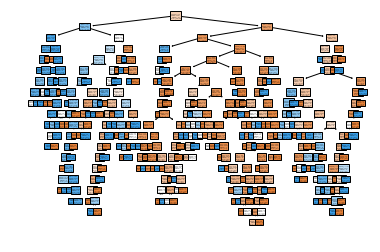

In [28]:
# точка с запятой, чтобы не выводить доп. информацию
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

Покажем, что произошло переобучение.

In [29]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [31]:
clf.score(X, y)

0.9797979797979798

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
clf.score(X_train, y_train)

0.9798657718120806

In [34]:
clf.score(X_test, y_test)

0.7728813559322034

Переобучение!

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
clf.score(X_train, y_train)

0.8338926174496645

In [42]:
clf.score(X_test, y_test)

0.823728813559322

Рассмотрим кросс-валидацию

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

In [49]:
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.8055084745762711